In [77]:
import numpy as np
import pandas as pd
import plotly.express as px


## Teams Data

In [2]:
teams = pd.read_csv(r'/content/teams.csv')
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


### Support Staff Data

In [3]:
support_staff = teams[['OWNER','HEADCOACH','GENERALMANAGER']]
support_staff = support_staff.values.tolist()

support_staff_df = []
for i in support_staff:
    for j in i:
      support_staff_df.append(j)
support_staff = pd.DataFrame(support_staff_df,columns=['Name'])

In [4]:
support_staff['support_id'] = [i for i in range(0,len(support_staff))]
support_staff  = support_staff[:40]
support_staff.head()

,Name,support_id
0,Tony Ressler,0
1,Lloyd Pierce,1
2,Travis Schlenk,2
3,Wyc Grousbeck,3
4,Brad Stevens,4


In [5]:
Coach = support_staff[:10]
Dietician = support_staff[10:20]
Physiotherapist = support_staff[20:30]
Manager = support_staff[30:40]

In [6]:
import random
import time
    
def str_time_prop(start, end, time_format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formatted in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(time_format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%d/%m/%Y', prop)

ls =[]
for i in range(0,20):
     ls.append(random_date("15/12/2021", "1/02/2022", random.random()))

In [7]:
## Adding extra columns
Dietician['available_date'] = ls[:10]
Physiotherapist['available_date'] = ls[10:]
Dietician.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,support_id,available_date
10,Jim Boylen,10,18/12/2021
11,Gar Forman,11,04/01/2022
12,Mark Cuban,12,08/01/2022
13,Rick Carlisle,13,09/01/2022
14,Donnie Nelson,14,31/01/2022


In [8]:
Dietician['available_date'] = pd.to_datetime(Dietician['available_date'])
Physiotherapist['available_date'] = pd.to_datetime(Physiotherapist['available_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
Coach['start_year'] = np.random.choice(range(2005,2010),size = len(Coach))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
support_staff.to_csv(r'Support_Staff.csv',index=False)
Coach.to_csv(r'Coach.csv',index=False)
Manager.to_csv(r'Manager.csv',index=False)

In [11]:
Dietician.to_csv(r'Dietician.csv',index=False)
Physiotherapist.to_csv(r'Physio.csv',index=False)

### EDA on Teams data

In [12]:
match_city = teams['CITY'].unique()
match_arena = teams['ARENA'].unique()
teams.loc[teams['DLEAGUEAFFILIATION']=='No Affiliate','DLEAGUEAFFILIATION'] = 'Random Team Name'
match_opp = teams['DLEAGUEAFFILIATION'].unique()

In [13]:
teams['MAX_YEAR'].value_counts()

2019    30
Name: MAX_YEAR, dtype: int64

In [14]:
teams.shape

(30, 14)

In [15]:
match_df_columns = ['CITY','ARENA']
coach_df_columns = ['GENERALMANAGER','HEADCOACH']

## Match Data

In [16]:
match_df = pd.read_csv(r'/content/games.csv')
match_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,0.429,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,0.364,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,0.487,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,0.447,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,0.308,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0


In [17]:
match_df['GAME_DATE_EST'].max(),match_df['GAME_DATE_EST'].min()

('2021-05-26', '2003-10-05')

In [18]:
match_df['HOME_TEAM_ID'].value_counts().shape

(30,)

In [19]:
match_df = match_df[~match_df['PTS_home'].isna()]
match_df = match_df.drop_duplicates(subset=['GAME_ID'])

In [20]:
match_df['Match_city'] = np.random.choice(match_city, size=len(match_df))
match_df['Match_arena'] = np.random.choice(match_arena, size=len(match_df))
match_df['Opposition Team'] = np.random.choice(match_opp, size=len(match_df))

In [21]:
cols_to_remove = ['GAME_STATUS_TEXT','VISITOR_TEAM_ID','TEAM_ID_home','TEAM_ID_away']
cols_to_keep = [i for i in match_df.columns.tolist() if i not in cols_to_remove]
match_df = match_df[cols_to_keep]

In [22]:
cols = {'GAME_DATE_EST':'Match Date','GAME_ID':'Match ID'}

In [23]:
match_df.shape

(24523, 20)

In [24]:
cols = {'GAME_ID':'match_id','GAME_DATE_EST':'match_date','PTS_home':'home_points','PTS_away':'away_points','SEASON':'season','Opposition Team':'opponent_team',
        'Match_city':'city','arena':'Match_arena','FG_PCT_home':'home_fg_per','FG_PCT_away':'away_fg_per','FT_PCT_home':'home_ft_per','FT_PCT_away':'away_ft_per',
        'home_3_per':'FG3_PCT_home','away_3_per':'FG3_PCT_away','AST_home':'home_assists','AST_away':'away_assists','REB_home':'home_rebounds','REB_away':'away_rebounds','HOME_TEAM_WINS':'home_wins'}

match_df.rename(columns=cols,inplace=True)

In [25]:
match_df['match_date'] = pd.to_datetime(match_df['match_date'])

In [26]:
match_df = match_df[cols.values()]
match_df.head()

,match_id,match_date,home_points,away_points,season,opponent_team,city,Match_arena,home_fg_per,away_fg_per,home_ft_per,away_ft_per,FG3_PCT_home,FG3_PCT_away,home_assists,away_assists,home_rebounds,away_rebounds,home_wins
0,42000102,2021-05-26,120.0,95.0,2020,Sioux Falls Skyforce,Philadelphia,Capital One Arena,0.557,0.402,0.684,0.633,0.429,0.091,26.0,22.0,45.0,40.0,1
1,42000132,2021-05-26,101.0,92.0,2020,Northern Arizona Suns,Dallas,Amway Center,0.383,0.369,0.739,0.818,0.364,0.273,15.0,17.0,54.0,41.0,1
2,42000142,2021-05-26,141.0,129.0,2020,Erie Bayhawks,Dallas,Target Center,0.544,0.541,0.774,0.763,0.487,0.348,28.0,20.0,42.0,33.0,1
3,42000112,2021-05-25,130.0,108.0,2020,Maine Red Claws,Washington,Talking Stick Resort Arena,0.523,0.424,0.955,0.783,0.447,0.353,31.0,23.0,46.0,43.0,1
4,42000152,2021-05-25,102.0,109.0,2020,Northern Arizona Suns,Memphis,American Airlines Center,0.465,0.450,0.933,0.871,0.308,0.303,21.0,24.0,31.0,39.0,0


In [27]:
match_df.to_csv(r'match_data.csv',index=False)

## Players Data

In [28]:
players_df = pd.read_csv (r'/content/players.csv')
players_df.shape

(7228, 4)

In [29]:
players_df.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [30]:
players_df = players_df.drop_duplicates(subset=['PLAYER_ID'])
players_df['PLAYER_ID_NEW'] = [i for i in range(0,len(players_df))]
players_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON,PLAYER_ID_NEW
0,Royce O'Neale,1610612762,1626220,2019,0
1,Bojan Bogdanovic,1610612762,202711,2019,1
2,Rudy Gobert,1610612762,203497,2019,2
3,Donovan Mitchell,1610612762,1628378,2019,3
4,Mike Conley,1610612762,201144,2019,4


In [31]:
team_ids = players_df['TEAM_ID'].unique()

In [42]:
## Additional data for players
players_df1 = pd.read_csv(r'/content/all_seasons.csv')
players_df1.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [43]:
players_df1['age'] = players_df1['age'].astype(int)
players_df1['player_weight'] = players_df1['player_weight'].round(2)

In [44]:
players_df1['season'] = players_df1['season'].str.split('-').str[0].str.strip()
players_df1['PLAYER_ID'] = [i for i in range(0,len(players_df1))]

In [45]:
players_df1['TEAM_ID'] = np.random.choice(team_ids,size = len(players_df1))

In [46]:
cols_to_keep = ['player_name','age','player_height','player_weight','college','draft_year','season','TEAM_ID','Status']
# players_df1[cols_to_keep]

In [47]:
players_df1['season'] = players_df1['season'].astype(int)

In [48]:
team_df = players_df1[['PLAYER_ID','TEAM_ID','season']].drop_duplicates()
team_df = team_df.merge(teams[['TEAM_ID','NICKNAME']],on='TEAM_ID',how='left')
cols = {'TEAM_ID':'team_id','PLAYER_ID':'player_id','NICKNAME':'team_name','season':'year'}
team_df.rename(columns = cols,inplace=True)
team_df.to_csv(r'Team.csv',index=False)

In [49]:
players_df_final = players_df1.sort_values(by=['player_name','season'],ascending=False).drop_duplicates(subset=['player_name'])
players_df_final = players_df_final.sort_values(by=['player_name'])
players_df_final.loc[players_df_final['season']==2020,'Status'] = 'Active'
players_df_final['Status'].fillna('Inactive',inplace=True)
player_df_final = players_df_final.loc[players_df_final['season']>=2003]
players_df_final['PLAYER_ID'] = [i for i in range(0,len(players_df_final))]
players_df_final.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,PLAYER_ID,TEAM_ID,Status
2031,2031,A.C. Green,MIA,37,205.74,102.06,Oregon State,USA,1985,1,23,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000,0,1610612753,Inactive
1711,1711,A.J. Bramlett,CLE,23,208.28,102.97,Arizona,USA,1999,2,39,8,1.0,2.8,0.0,-32.6,0.158,0.208,0.146,0.190,0.000,1999,1,1610612761,Inactive
2920,2920,A.J. Guyton,GSW,25,185.42,81.65,Indiana,USA,2000,2,32,2,0.0,0.0,1.0,-3.9,0.000,0.000,0.282,0.000,0.400,2002,2,1610612763,Inactive
9404,9404,AJ Hammons,DAL,24,213.36,117.93,Purdue,USA,2016,2,46,22,2.2,1.6,0.2,-0.6,0.049,0.199,0.167,0.472,0.038,2016,3,1610612749,Inactive
8380,8380,AJ Price,CLE,28,187.96,88.45,Connecticut,USA,2009,2,52,26,5.1,1.2,1.8,-12.2,0.019,0.096,0.226,0.451,0.254,2014,4,1610612757,Inactive


In [50]:
x = dict(zip(players_df_final['player_name'],players_df_final['PLAYER_ID']))
players_df1['PLAYER_ID'] = players_df1['player_name'].map(x)

In [51]:
temp = players_df.merge(players_df_final[['PLAYER_ID','player_name']],left_on='PLAYER_ID_NEW',right_on='PLAYER_ID',how='left')
temp.rename(columns={'PLAYER_ID_x':'PLAYER_ID'},inplace=True)
temp_dict = dict(zip(temp['PLAYER_ID'].astype(int),temp['PLAYER_ID_NEW'].astype(int)))
temp_dict1 = dict(zip(temp['PLAYER_ID_NEW'].astype(int),temp['player_name']))

In [52]:
players_df1.shape,players_df1['player_name'].nunique()

((11700, 24), 2333)

In [53]:
players_df3 = pd.read_csv(r'/content/player_data_dob.csv')
players_df3['PLAYER_ID'] = [i for i in range(0,players_df3.shape[0])]
players_df3.head()

,name,year_start,year_end,position,height,weight,birth_date,college,PLAYER_ID
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,1
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",2
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,3
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,4


In [54]:
players_df_final = players_df_final.merge(players_df3[['PLAYER_ID','position','birth_date']],on='PLAYER_ID',how='left')
players_df_final[['PLAYER_ID','player_name','age','birth_date','position','player_height','player_weight','Status']]

,PLAYER_ID,player_name,age,birth_date,position,player_height,player_weight,Status
0,0,A.C. Green,37,"June 24, 1968",F-C,205.74,102.06,Inactive
1,1,A.J. Bramlett,23,"April 7, 1946",C-F,208.28,102.97,Inactive
2,2,A.J. Guyton,25,"April 16, 1947",C,185.42,81.65,Inactive
3,3,AJ Hammons,24,"March 9, 1969",G,213.36,117.93,Inactive
4,4,AJ Price,28,"November 3, 1974",F,187.96,88.45,Inactive
...,...,...,...,...,...,...,...,...
2328,2328,Zion Williamson,20,"December 10, 1973",G,200.66,128.82,Active
2329,2329,Zoran Dragic,26,"November 11, 1937",F-C,195.58,90.72,Inactive
2330,2330,Zoran Planinic,23,"June 7, 1953",G,200.66,90.72,Inactive
2331,2331,Zydrunas Ilgauskas,36,"December 17, 1982",F,220.98,117.93,Inactive


In [55]:
cols = {'PLAYER_ID':'player_id','birth_date':'date_of_birth','position':'pos','player_height':'height','player_weight':'weight','Status':'status'}
players_df_final.rename(columns=cols,inplace=True)
players_df_final[['player_id','player_name','age','date_of_birth','pos','height','weight','status']]

,player_id,player_name,age,date_of_birth,pos,height,weight,status
0,0,A.C. Green,37,"June 24, 1968",F-C,205.74,102.06,Inactive
1,1,A.J. Bramlett,23,"April 7, 1946",C-F,208.28,102.97,Inactive
2,2,A.J. Guyton,25,"April 16, 1947",C,185.42,81.65,Inactive
3,3,AJ Hammons,24,"March 9, 1969",G,213.36,117.93,Inactive
4,4,AJ Price,28,"November 3, 1974",F,187.96,88.45,Inactive
...,...,...,...,...,...,...,...,...
2328,2328,Zion Williamson,20,"December 10, 1973",G,200.66,128.82,Active
2329,2329,Zoran Dragic,26,"November 11, 1937",F-C,195.58,90.72,Inactive
2330,2330,Zoran Planinic,23,"June 7, 1953",G,200.66,90.72,Inactive
2331,2331,Zydrunas Ilgauskas,36,"December 17, 1982",F,220.98,117.93,Inactive


In [56]:
players_df_final = players_df_final[['player_id','player_name','age','date_of_birth','pos','height','weight','status']]

In [57]:
players_df_final['date_of_birth'].fillna('January 1,1997',inplace=True)
players_df_final['pos'].fillna('G',inplace=True)

In [58]:
players_df_final['date_of_birth'] = pd.to_datetime(players_df_final['date_of_birth'])

In [59]:
players_df_final['player_id'].max()

2332

In [60]:
players_df_final.to_csv('players_data.csv',index=False)

## Match and Player Mapping

In [61]:
game_stats = pd.read_csv(r'/content/games_details.csv')
game_stats.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.0,28.0,0.500,1.0,6.0,0.167,4.0,6.0,0.667,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.0,6.0,0.667,1.0,1.0,1.000,2.0,3.0,0.667,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.0,5.0,0.600,0.0,0.0,0.000,0.0,0.0,0.000,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.0,5.0,0.400,0.0,2.0,0.000,0.0,0.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.0,10.0,0.200,0.0,3.0,0.000,6.0,10.0,0.600,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0


In [62]:
game_stats.shape,game_stats['TEAM_ID'].nunique()

((91638, 28), 30)

In [63]:
game_stats['PLAYER_ID_NEW'] = game_stats['PLAYER_ID'].map(temp_dict)
game_stats['PLAYER_NAME'] = game_stats['PLAYER_ID'].map(temp_dict1)

In [64]:
game_stats = game_stats[~game_stats['PLAYER_ID_NEW'].isna()]
game_stats.shape

(83586, 29)

In [65]:
game_stats['PLAYER_ID'] = game_stats['PLAYER_ID_NEW'].astype(int)

In [66]:
game_stats = game_stats.merge(match_df[['match_id','season']],right_on='match_id',left_on='GAME_ID',how = 'left')

In [67]:
## Dataset for mapping for between Team and Match
plays_df = game_stats[['match_id','TEAM_ID','season']].drop_duplicates()
plays_df.shape

(7208, 3)

In [68]:
plays_df.to_csv(r'plays_data.csv',index=False)

In [69]:
cols = {'GAME_ID':'match_id','PLAYER_ID':'player_id','FG_PCT':'FG_percent','FG3_PCT':'FG3_percent','FT_PCT':'FT_percent',
        'OREB':'Offensive_rebound','DREB':'Defensive_rebounds','REB':'rebounds','AST':'assists','STL':'steals','BLK':'blocked_shots',
        'TO':'turnovers','PF':'personal_fouls','PTS':'points_scored'}
cols_to_keep = list(cols.values())
cols_to_keep

['match_id',
 'player_id',
 'FG_percent',
 'FG3_percent',
 'FT_percent',
 'Offensive_rebound',
 'Defensive_rebounds',
 'rebounds',
 'assists',
 'steals',
 'blocked_shots',
 'turnovers',
 'personal_fouls',
 'points_scored']

In [70]:
game_stats.rename(columns=cols,inplace=True)
game_stats1 = game_stats[cols_to_keep]
game_stats1.head()

,match_id,match_id,player_id,FG_percent,FG3_percent,FT_percent,Offensive_rebound,Defensive_rebounds,rebounds,assists,steals,blocked_shots,turnovers,personal_fouls,points_scored
0,42000102,42000102,290,0.500,0.167,0.667,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0
1,42000102,42000102,288,0.667,1.000,0.667,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0
2,42000102,42000102,142,0.600,0.000,0.000,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0
3,42000102,42000102,20,0.400,0.000,0.000,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0
4,42000102,42000102,332,0.200,0.000,0.600,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0


In [71]:
game_stats[game_stats['season']==2020].shape

(26776, 31)

In [78]:
req_df = game_stats[game_stats['season']==2020]
req_df = req_df.groupby(['player_id'])['points_scored'].sum().reset_index().sort_values(by=['points_scored'],ascending=False)
req_df = req_df.merge(players_df_final[['player_id','player_name']],on='player_id',how='left')
req_df = req_df[:10]
fig = px.bar(req_df, x='player_name', y='points_scored',title="Top 10 players with highest score")
fig.update_layout(width=800)
fig.update_xaxes(title = 'Player Name')
fig.update_yaxes(title = 'Highest Score')
fig.show()

In [79]:
lreq_df = game_stats[game_stats['season']==2020]
req_df = req_df.groupby(['player_id'])['FG_percent'].mean().reset_index().sort_values(by=['FG_percent'],ascending=False)
req_df = req_df.merge(players_df_final[['player_id','player_name']],on='player_id',how='left')
req_df['FG_percent'] = req_df['FG_percent']*100
req_df = req_df[:10]
fig = px.bar(req_df, x='player_name', y='FG_percent',title="Top 10 players with highest FG %")
fig.update_layout(width=800)
fig.update_xaxes(title = 'Player Name')
fig.update_yaxes(title = '% of Field Goals')
fig.show()

KeyError: ignored

In [80]:
req_df = game_stats[game_stats['season']==2020]
req_df = req_df.groupby(['player_id'])['FT_percent'].mean().reset_index().sort_values(by=['FT_percent'],ascending=False)
req_df = req_df.merge(players_df_final[['player_id','player_name']],on='player_id',how='left')
req_df['FT_percent'] = req_df['FT_percent']*100
req_df = req_df[:10]
fig = px.bar(req_df, x='player_name', y='FT_percent',title="Top 10 players with highest FT %")
fig.update_layout(width=800)
fig.update_xaxes(title = 'Player Name')
fig.update_yaxes(title = '% of Free Throws')
fig.show()

In [81]:
req_df = game_stats[game_stats['season']==2020]
req_df = req_df.groupby(['player_id'])['FG3_percent'].mean().reset_index().sort_values(by=['FG3_percent'],ascending=False)
req_df = req_df.merge(players_df_final[['player_id','player_name']],on='player_id',how='left')
req_df['FG3_percent'] = req_df['FG3_percent']*100
req_df = req_df[:10]
fig = px.bar(req_df, x='player_name', y='FG3_percent',title="Top 10 players with highest FG3 %")
fig.update_layout(width=800)
fig.update_xaxes(title = 'Player Name')
fig.update_yaxes(title = '% of 3 Pointers')
fig.show()

In [82]:
game_stats1.to_csv('has_match_stats.csv',index=False)

## Cleaning the scraped data for Contracts

In [83]:
contract = pd.read_csv(r'/content/Contracts.csv')
contract.head()

,Unnamed: 0,name,contract_start_year,contract_end_year,fa_year,signed_age,values_dollars,aav_dollars
0,0,Giannis Antetokounmpo,2021,2025,2026,26,228200420,45640084
1,1,Stephen Curry,2022,2025,2026,33,215353664,53838416
2,2,Luka Doncic,2022,2026,2027,22,207060000,41412000
3,3,Russell Westbrook,2018,2022,2023,28,206794070,41358814
4,4,Rudy Gobert,2021,2025,2026,28,205000002,41000000


In [84]:
contract.loc[contract['signed_age']=='-','signed_age'] = -1

In [85]:
contract['signed_age'] = contract['signed_age'].astype(int)

In [86]:
mask = (contract['signed_age'] >=18) & (contract['signed_age'] <=35)
temp = np.random.choice(range(18,36), size=len(contract[~mask]))
contract.loc[~mask,'signed_age'] = temp
contract[mask].head()

,Unnamed: 0,name,contract_start_year,contract_end_year,fa_year,signed_age,values_dollars,aav_dollars
0,0,Giannis Antetokounmpo,2021,2025,2026,26,228200420,45640084
1,1,Stephen Curry,2022,2025,2026,33,215353664,53838416
2,2,Luka Doncic,2022,2026,2027,22,207060000,41412000
3,3,Russell Westbrook,2018,2022,2023,28,206794070,41358814
4,4,Rudy Gobert,2021,2025,2026,28,205000002,41000000


In [87]:
mask = (contract['contract_end_year'] == 0) & (contract['contract_start_year']!=0)
contract.loc[mask,'contract_end_year'] = contract.loc[mask]['contract_start_year']+5

In [88]:
mask = (contract['contract_start_year'] == 0) & (contract['contract_end_year']!=0)
contract.loc[mask,'contract_start_year'] = contract.loc[mask]['contract_end_year']-5

In [89]:
mask = (contract['contract_end_year']!=0)
contract.loc[mask,'fa_year'] = contract.loc[mask]['contract_end_year']+1

In [90]:
contract['contract_end_year'] = contract['fa_year']-1
contract['contract_start_year'] = contract['contract_end_year']-5

In [91]:
contract = contract[contract['contract_end_year']>0]

In [92]:
contract.head()

,Unnamed: 0,name,contract_start_year,contract_end_year,fa_year,signed_age,values_dollars,aav_dollars
0,0,Giannis Antetokounmpo,2020,2025,2026,26,228200420,45640084
1,1,Stephen Curry,2020,2025,2026,33,215353664,53838416
2,2,Luka Doncic,2021,2026,2027,22,207060000,41412000
3,3,Russell Westbrook,2017,2022,2023,28,206794070,41358814
4,4,Rudy Gobert,2020,2025,2026,28,205000002,41000000


In [93]:
contract['player_id'] = [i for i in range(0,len(contract))]
# contract = contract.merge(players_df_final[['PLAYER_ID','player_name']],on='PLAYER_ID',how='left')
contract

,Unnamed: 0,name,contract_start_year,contract_end_year,fa_year,signed_age,values_dollars,aav_dollars,player_id
0,0,Giannis Antetokounmpo,2020,2025,2026,26,228200420,45640084,0
1,1,Stephen Curry,2020,2025,2026,33,215353664,53838416,1
2,2,Luka Doncic,2021,2026,2027,22,207060000,41412000,2
3,3,Russell Westbrook,2017,2022,2023,28,206794070,41358814,3
4,4,Rudy Gobert,2020,2025,2026,28,205000002,41000000,4
...,...,...,...,...,...,...,...,...,...
1995,1995,Greivis Vasquez,2011,2016,2017,28,4347826,4347826,1994
1996,1996,Quentin Richardson,2010,2015,2016,33,4347184,1449061,1995
1997,1997,Aron Baynes,2012,2017,2018,30,4328000,4328000,1996
1998,1998,Miles McBride,2018,2023,2024,20,4324872,1441624,1997


In [94]:
contract['approval status'] = np.random.choice(['Yes','Pending','No'],size = len(contract))
contract['support_id'] = np.random.choice(Manager['support_id'],size = len(contract))
to_remove = ['name','Unnamed: 0','signed_age']
cols = {'contract_start_year':'start_year','contract_end_year':'end_year'}
contract.rename(columns = cols,inplace=True)
cols_to_keep  = [i for i in contract.columns if i not in to_remove]

In [95]:
contract = contract[cols_to_keep]
contract.to_csv(r'Contract_new.csv',index=False)

## Clustering Model 

In [96]:
game_stats.head()

,match_id,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,player_id,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_percent,FG3M,FG3A,FG3_percent,FTM,FTA,FT_percent,Offensive_rebound,Defensive_rebounds,rebounds,assists,steals,blocked_shots,turnovers,personal_fouls,points_scored,PLUS_MINUS,PLAYER_ID_NEW,match_id,season
0,42000102,1610612764,WAS,Washington,290,NaN,F,NaN,34:36,14.0,28.0,0.500,1.0,6.0,0.167,4.0,6.0,0.667,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0,290.0,42000102,2020
1,42000102,1610612764,WAS,Washington,288,NaN,F,NaN,25:50,4.0,6.0,0.667,1.0,1.0,1.000,2.0,3.0,0.667,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0,288.0,42000102,2020
2,42000102,1610612764,WAS,Washington,142,NaN,C,NaN,12:11,3.0,5.0,0.600,0.0,0.0,0.000,0.0,0.0,0.000,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0,142.0,42000102,2020
3,42000102,1610612764,WAS,Washington,20,NaN,G,NaN,19:19,2.0,5.0,0.400,0.0,2.0,0.000,0.0,0.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0,20.0,42000102,2020
4,42000102,1610612764,WAS,Washington,332,NaN,G,NaN,29:07,2.0,10.0,0.200,0.0,3.0,0.000,6.0,10.0,0.600,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0,332.0,42000102,2020


In [97]:
grp = game_stats.groupby(['player_id'],as_index=False).size()
grp[grp['size']>10].shape,grp.shape

((875, 2), (945, 2))

In [98]:
grp  = grp[grp['size']>10]
game_stats = game_stats[game_stats['player_id'].isin(grp['player_id'])]
game_stats.head()

,match_id,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,player_id,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_percent,FG3M,FG3A,FG3_percent,FTM,FTA,FT_percent,Offensive_rebound,Defensive_rebounds,rebounds,assists,steals,blocked_shots,turnovers,personal_fouls,points_scored,PLUS_MINUS,PLAYER_ID_NEW,match_id,season
0,42000102,1610612764,WAS,Washington,290,NaN,F,NaN,34:36,14.0,28.0,0.500,1.0,6.0,0.167,4.0,6.0,0.667,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0,290.0,42000102,2020
1,42000102,1610612764,WAS,Washington,288,NaN,F,NaN,25:50,4.0,6.0,0.667,1.0,1.0,1.000,2.0,3.0,0.667,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0,288.0,42000102,2020
2,42000102,1610612764,WAS,Washington,142,NaN,C,NaN,12:11,3.0,5.0,0.600,0.0,0.0,0.000,0.0,0.0,0.000,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0,142.0,42000102,2020
3,42000102,1610612764,WAS,Washington,20,NaN,G,NaN,19:19,2.0,5.0,0.400,0.0,2.0,0.000,0.0,0.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0,20.0,42000102,2020
4,42000102,1610612764,WAS,Washington,332,NaN,G,NaN,29:07,2.0,10.0,0.200,0.0,3.0,0.000,6.0,10.0,0.600,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0,332.0,42000102,2020


In [99]:
game_stats2 = game_stats[~game_stats['FGM'].isna()] 
game_stats2.shape

(70309, 31)

In [100]:
to_remove = ['TEAM_ABBREVIATION','TEAM_CITY','PLAYER_NAME','START_POSITION','COMMENT','match_id','season','TEAM_ID','player_id','PLAYER_ID_NEW','MIN','PLUS_MINUS']
cols_to_keep = [i for i in game_stats2.columns if i not in to_remove]
game_stats3 = game_stats2[cols_to_keep]

In [101]:
cols_to_keep = ['FGM','FG3M','FTM']
game_stats4 = game_stats2[cols_to_keep]

In [102]:
game_stats3['FG3_percent'] = game_stats3['FG3_percent']*100
game_stats3['FG_percent'] = game_stats3['FG_percent']*100
game_stats3['FT_percent'] = game_stats3['FT_percent']*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

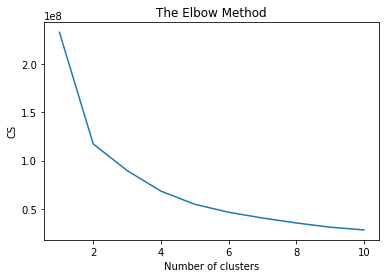

In [103]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit_predict(game_stats3[['FG3_percent','FG_percent','FT_percent']])
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [104]:
## Free Throw Clusters
from sklearn.cluster import KMeans

kmeans_FT = KMeans(n_clusters=3, random_state=0) 
""
game_stats3['cluster_FT'] = kmeans_FT.fit_predict(game_stats3[['FTM','FTA']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
## Field Goals Clusters
kmeans_FG = KMeans(n_clusters=3, random_state=0) 
""
game_stats3['cluster_FG'] = kmeans_FG.fit_predict(game_stats3[['FGM','FGA']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
## 3 Pointer Clusters
kmeans_F3G = KMeans(n_clusters=3, random_state=0) 
""
game_stats3['cluster_FG3'] = kmeans_F3G.fit_predict(game_stats3[['FG3M','FG3A']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Text(0, 0.5, 'Field Throws Attempted')

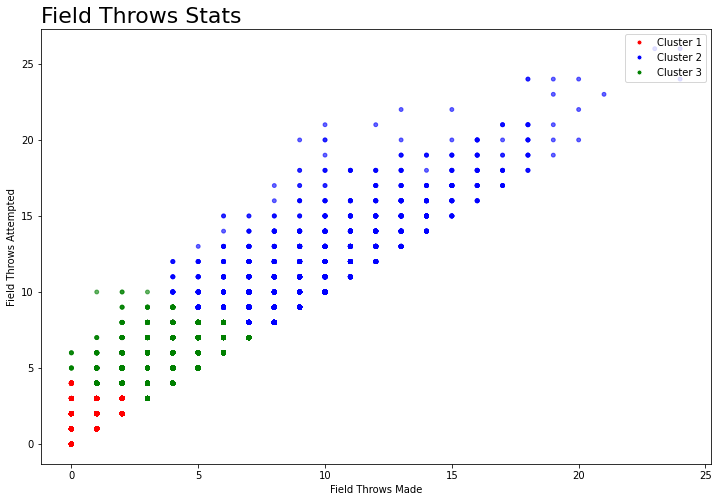

In [107]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means

# get centroids
centroids = kmeans_FT.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
game_stats3['cen_x_FT'] = game_stats3['cluster_FT'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
game_stats3['cen_y_FT'] = game_stats3['cluster_FT'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['Red', 'Blue', 'Green']
game_stats3['c'] = game_stats3['cluster_FT'].map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(12,8))
# plot data
plt.scatter(game_stats3['FTM'], game_stats3['FTA'], c=game_stats3['c'], alpha = 0.6, s=15)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Field Throws Stats', loc='left', fontsize=22)
plt.xlabel('Field Throws Made')
plt.ylabel('Field Throws Attempted')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Text(0, 0.5, 'Field Goals Attempted')

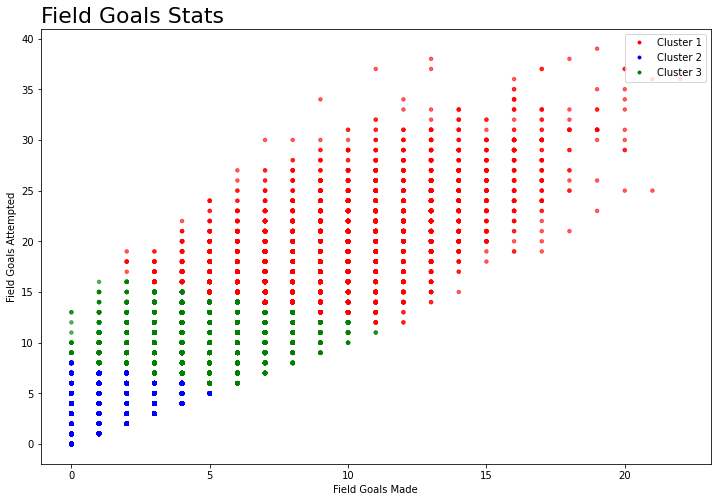

In [108]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means

# get centroids
centroids = kmeans_FG.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
game_stats3['cen_x_FG'] = game_stats3['cluster_FG'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
game_stats3['cen_y_FG'] = game_stats3['cluster_FG'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['Red', 'Blue', 'Green']
game_stats3['c'] = game_stats3['cluster_FG'].map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(12,8))
# plot data
plt.scatter(game_stats3['FGM'], game_stats3['FGA'], c=game_stats3['c'], alpha = 0.6, s=12)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Field Goals Stats', loc='left', fontsize=22)
plt.xlabel('Field Goals Made')
plt.ylabel('Field Goals Attempted')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Text(0, 0.5, '3 Pointers Attempted')

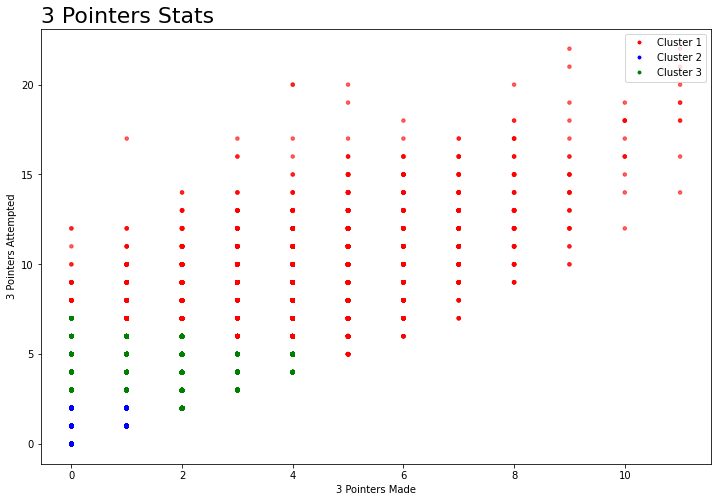

In [109]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means

# get centroids
centroids = kmeans_F3G.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
game_stats3['cen_x_FG3'] = game_stats3['cluster_FG3'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
game_stats3['cen_y_FG3'] = game_stats3['cluster_FG3'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['Red', 'Blue', 'Green']
game_stats3['c_FG3'] = game_stats3['cluster_FG3'].map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(12,8))
# plot data
plt.scatter(game_stats3['FG3M'], game_stats3['FG3A'], c=game_stats3['c_FG3'], alpha = 0.6, s=12)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('3 Pointers Stats', loc='left', fontsize=22)
plt.xlabel('3 Pointers Made')
plt.ylabel('3 Pointers Attempted')

Text(0, 0.5, 'Field Goals Attempted')

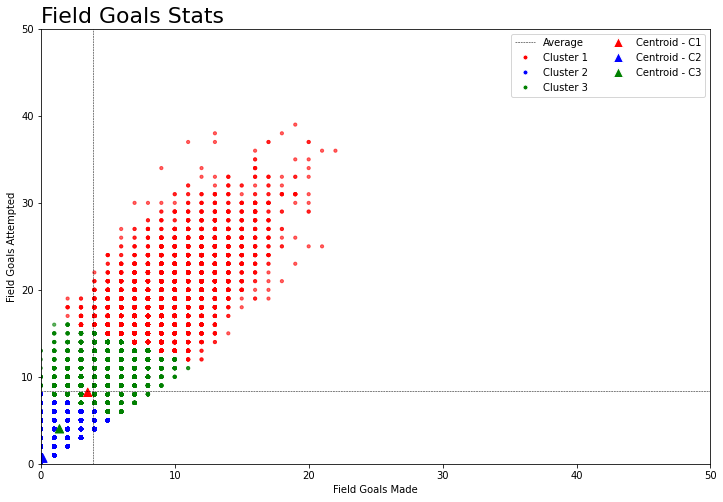

In [110]:
## Centroids for each cluster for Filed Goals
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(12,8))
# plot data
plt.scatter(game_stats3['FGM'], game_stats3['FGA'], c=game_stats3['c'], alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([game_stats3['FGM'].mean()]*2, [0,50], color='black', lw=0.5, linestyle='--')
plt.xlim(0,50)
# plot Defense mean
plt.plot([0,50], [game_stats3['FGA'].mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,50)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Field Goals Stats', loc='left', fontsize=22)
plt.xlabel('Field Goals Made')
plt.ylabel('Field Goals Attempted')

**THE END**